In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [5]:
from tensorflow.keras.datasets import cifar10

# Define class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Load CIFAR-10 directly from TensorFlow (automatically downloads if needed)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten images into rows to mimic CSV-style structure
train_data = pd.DataFrame(x_train.reshape(x_train.shape[0], -1))
train_data['label'] = y_train

test_data = pd.DataFrame(x_test.reshape(x_test.shape[0], -1))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1080s 6us/step


In [6]:
# Separate features and labels
x_train = train_data.iloc[:, :-1].values
y_train = train_data['label'].values.flatten()
x_test = test_data.values

# Normalize pixel values (0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape back to 32x32x3 images
x_train = x_train.reshape(-1, 32, 32, 3)
x_test = x_test.reshape(-1, 32, 32, 3)

# One-hot encode labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, 10)

# Split training and validation sets
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# One-hot encode training split labels
y_train_split_encoded = tf.keras.utils.to_categorical(y_train_split, 10)


In [7]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x_train_split, y_train_split_encoded,
    epochs=10,
    batch_size=32,
    validation_data=(x_val, tf.keras.utils.to_categorical(y_val, 10))
)


Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.3098 - loss: 1.8929 - val_accuracy: 0.3595 - val_loss: 1.7866
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.3839 - loss: 1.7116 - val_accuracy: 0.3729 - val_loss: 1.7290
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.4130 - loss: 1.6392 - val_accuracy: 0.4296 - val_loss: 1.6164
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 31ms/step - accuracy: 0.4339 - loss: 1.5803 - val_accuracy: 0.4344 - val_loss: 1.5730
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 42s 32ms/step - accuracy: 0.4502 - loss: 1.5371 - val_accuracy: 0.4408 - val_loss: 1.5613
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 31ms/step - accuracy: 0.4654 - loss: 1.4992 - val_accuracy: 0.4492 - val_loss: 1.5309
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.4765 - loss: 1.4648 - val_accuracy: 0.4634 - val_loss: 1.5010
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 76s 31ms/step - accuracy: 0.4870 -

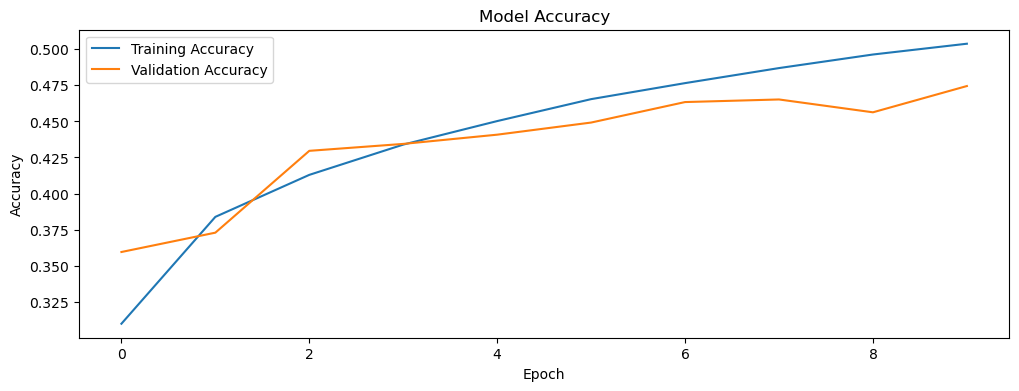

In [9]:
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [10]:
# Predictions on validation data
val_predictions = model.predict(x_val)
y_val_pred_classes = np.argmax(val_predictions, axis=1)

# Classification report
report = classification_report(y_val, y_val_pred_classes, target_names=class_names)
print(report)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

    airplane       0.52      0.51      0.51       973
  automobile       0.56      0.62      0.59       979
        bird       0.39      0.27      0.32      1030
         cat       0.35      0.28      0.31      1023
        deer       0.40      0.36      0.38       933
         dog       0.40      0.37      0.38      1015
        frog       0.48      0.55      0.51       996
       horse       0.46      0.61      0.52       994
        ship       0.53      0.74      0.62      1017
       truck       0.61      0.45      0.52      1040

    accuracy                           0.47     10000
   macro avg       0.47      0.48      0.47     10000
weighted avg       0.47      0.47      0.47     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


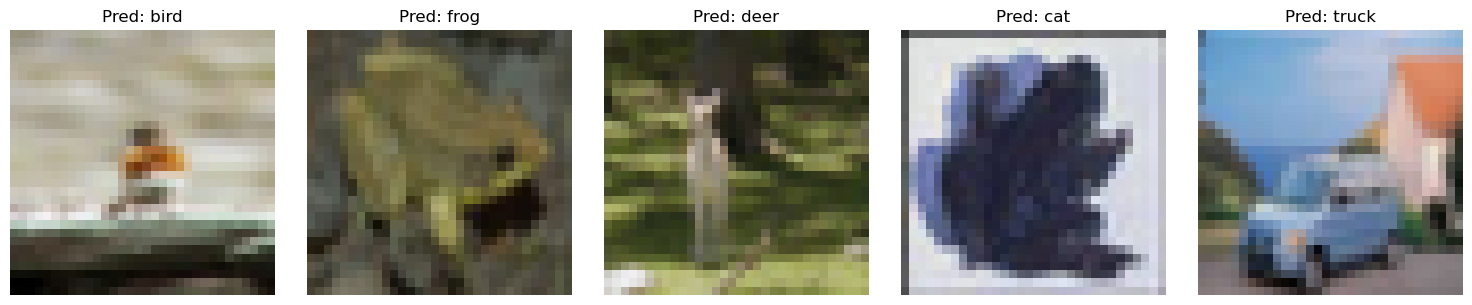

In [11]:
predictions = model.predict(x_test)
y_pred_classes = np.argmax(predictions, axis=1)

# Display a few test images with predicted labels
num_images = 5
random_indices = np.random.choice(x_test.shape[0], num_images, replace=False)

plt.figure(figsize=(15, 3))
for i, idx in enumerate(random_indices):
    test_image = x_test[idx]
    predicted_label = y_pred_classes[idx]
    predicted_class_name = class_names[predicted_label]
    
    plt.subplot(1, num_images, i + 1)
    plt.imshow(test_image)
    plt.title(f"Pred: {predicted_class_name}")
    plt.axis('off')

plt.tight_layout()
plt.show()
